anomaly detection 5
anomaly detection 9
anomaly detection 16


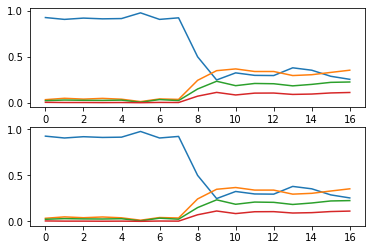

In [14]:
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

def make_svmdata_from_file(fname):
    dlist = []
    fp = open(fname,"r")
    for line in fp:
        tmp = []
        line = line.strip("\r\n")
        psd = line.split(",")
        for td in psd:
            if len(tmp) >= 4: break ## valid dimension
            tmp.append(float(td))
        dlist.append(tmp)
    fp.close()
    return dlist    
    
#1. read svm input ( train, test)
train = make_svmdata_from_file("p.train")
test = make_svmdata_from_file("p.train")

#2. svm test
X_train = np.array(train)
X_test = np.array(test)

anomalymodel = OneClassSVM(nu=0.12, kernel='rbf', gamma=0.1)
anomalymodel.fit(X_train)
p = anomalymodel.predict(X_test)

pos=0
for pd in p:
    pos += 1
    if pd == -1:
        print ("anomaly detection", pos - 1)

#3. ploting
plt.subplot(2,1,1)
plt.plot(X_train)
plt.subplot(2,1,2)
plt.plot(X_test)
plt.show()


In [10]:
train

[[0.926, 0.034, 0.023, 0.005],
 [0.906, 0.049, 0.03, 0.003],
 [0.92, 0.04, 0.027, 0.003],
 [0.912, 0.048, 0.026, 0.002],
 [0.915, 0.039, 0.029, 0.003],
 [0.977, 0.013, 0.006, 0.001],
 [0.906, 0.042, 0.035, 0.004],
 [0.923, 0.037, 0.024, 0.003],
 [0.5, 0.244, 0.15, 0.072],
 [0.248, 0.349, 0.234, 0.113],
 [0.325, 0.368, 0.186, 0.085],
 [0.298, 0.34, 0.21, 0.105],
 [0.296, 0.34, 0.207, 0.106],
 [0.38, 0.296, 0.184, 0.091],
 [0.354, 0.305, 0.2, 0.095],
 [0.288, 0.33, 0.222, 0.107],
 [0.255, 0.354, 0.226, 0.112]]

In [11]:
p

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1],
      dtype=int64)